<font size="6">Data Science Homework 3</font><br/><br/>
<font size="4">Name: Phani Teja Kesha</font><br/>
<font size="4">Student ID: KP38691</font><br/>
<font size="4">Email: phani1@umbc.edu</font><br/>

In [1]:
"""
Author: Phani Teja Kesha
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import math

All the import statements in the program can be found in the above block, we are using imports like numpy, matlplotlib.pyplot,sklearn etc

In [2]:
"""
Function: InitializeData
Input: None
Output: trainData,trainLabels
"""
def initializeData():
    Data = np.loadtxt('mnist_data.txt')
    Labels = np.loadtxt('mnist_labels.txt')
    trainData = Data/255
    trainLabels = Labels
    return trainData,trainLabels

# The data is divided by 255, To normalize them from 0-1

In [3]:
"""
Function: Sigmoid
Input: List of weights
Output: Returns a float value
"""
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [4]:
"""
Function: logisticRegression
Input: TrainingData,TrainingLabels, iterations, n(Theta), l(lambda)
Output: Returns weight vector
"""
def logisticRegression(trainData,trainLabels,iterations,n,l):
    lenVector = len(trainData[0])
    w = np.zeros(lenVector)
    for i in range(iterations):
        g = np.zeros(lenVector)
        for j in range(0,len(trainData)):
            pI = sigmoid(np.dot(trainData[j],w)) - l*math.sqrt(np.sum(abs(w)))
            if trainLabels[j]!=8:
                checkAns = 0
            else:
                checkAns = 1
            errorI = checkAns-pI 
            g = g+ errorI*trainData[j]
        w = w + n*g     
    w = normalize(w[:,np.newaxis], axis=0).ravel()
    return w

## Regularizer is square root of the absolute sum of each weight vectors
## If l = 0 that means regularizer is equal to zero and has no effect on the model

In [5]:
"""
Function: testing
Input: TrainingData,TrainingLabels, weightvector
Output: Returns accuracy
"""
def testing(testData,testLabels,w):
    acc = 0
    for i in range(0,len(testData)):
        pI = sigmoid(np.dot(testData[i],w))
        if pI > 0.5 and testLabels[i]==8:
            acc+=1
        if pI <0.5 and testLabels[i]!=8:
            acc+=1
    return (acc/len(testData))*100

In [6]:
"""
Function: drawWeight
Input: weightvector
Output: Returns plot of the weight vector
"""
def drawWeight(w):
    w = w.reshape((28, 28))
    plt.imshow(w, cmap='Greys',interpolation='bilinear')
    plt.show()

In [7]:
#Run this block to load the data for the notebook
Data = np.loadtxt('mnist_data.txt')
Labels = np.loadtxt('mnist_labels.txt')

In [8]:
#checking accuracies for the Model with different iterations
def iterMain():
    iterations = [1,2,3,4,5,10,20,25,50,100,200]
    accIterations = []
    trainData = Data/255
    trainLabels = Labels 
    for i in iterations:
        weightVector = logisticRegression(trainData,trainLabels,i,0.08,0)
        accuracy = testing(trainData,trainLabels,weightVector)
        accIterations.append(accuracy)
    plt.plot(iterations,accIterations)
    plt.show()  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


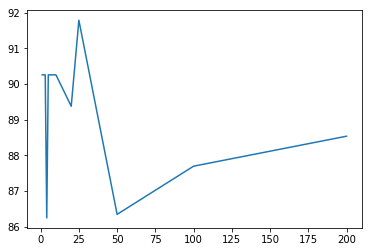

In [9]:
iterMain()

# Iterations Vs Accuracy 
Here, I have plotted the iterations vs accuracy from the given training set to set the number of iterations.<br> From the above plot we can see that the accuracy is good at 25 and its becoming constant after 50 iterations. Let's take iterations to be 25. Even though we are having a good accuracies at some higher iterations, it takes larger computation times, even at twenty we can have simlar accuracies. There maybe overfitting if the iterations are very high!

# Different lambda vs Accuracies

In [10]:
"""
Function: main()
Input: None
Output: None
"""
def main():
    l = [0,0.00001,0.00002,0.0003,0.0004,0.001,0.005,0.01,0.1,0.2,0.3,0.4]
    acc_L = []
    for i in l:
        trainData = Data/255
        trainLabels = Labels 
        weightVector = logisticRegression(trainData,trainLabels,25,0.0008,i)
        accuracy = testing(trainData,trainLabels,weightVector)
        acc_L.append(accuracy)
        #drawWeight(weightVector)
    print(l,acc_L)
    plt.plot(l,acc_L)
    plt.show()

[0, 1e-05, 2e-05, 0.0003, 0.0004, 0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.4] [90.36, 90.25999999999999, 76.59, 88.32, 77.42999999999999, 91.88, 90.25999999999999, 17.62, 9.74, 9.74, 9.74, 9.74]


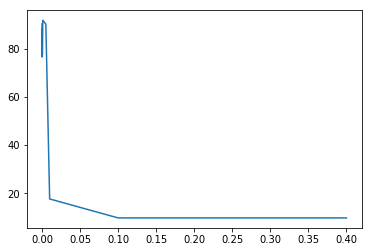

In [11]:
main()

In the above code i have taken different Lamda values which were ranging from 0 to 0.4, The accuracy for 0 that is equal to having no regularizer has a accuracy of 90.36, and for very less values of lambda the accuracies are increasing and decreasing untill some values but after a threshold lamda value of 0.1 the accuracies is always 9.74!

# why 9.74!

In [14]:
trainLabels = Labels 
numberOfeights = 0
for i in range(0,len(trainLabels)):
    if trainLabels[i]==8:
        numberOfeights+=1
print(numberOfeights)        

974


There are total 974 eights in the given training set, so that means the model is always predicting the number to be eight. That means the model is biased always towards 8 if the lambda is high! Literally it just predicts all the numbers to be 8, that's the reason the accuracy is 9.74 and the model is underfitted. If lambda is high underfitting occurs and for lower values of lambda the accuracies are decent.

In [12]:
"""
Function: main()
Input: None
Output: None
"""
def main():
    l = [0,0.00001,0.00002,0.0003,0.0004,0.001,0.005]
    acc_L = []
    for i in l:
        trainData = Data/255
        trainLabels = Labels 
        weightVector = logisticRegression(trainData,trainLabels,25,0.0008,i)
        accuracy = testing(trainData,trainLabels,weightVector)
        acc_L.append(accuracy)
        #drawWeight(weightVector)
    print(l,acc_L)
    plt.plot(l,acc_L)
    plt.show()

[0, 1e-05, 2e-05, 0.0003, 0.0004, 0.001, 0.005] [90.36, 90.25999999999999, 76.59, 88.32, 77.42999999999999, 91.88, 90.25999999999999]


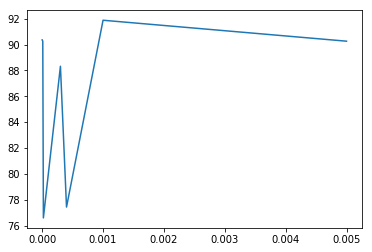

In [13]:
main()

In the above we have tested our model on the same training data which we have used to build the data this may some times lead to overfitting, so i have divided the train and test data into two different parts by selecting 80,20 parts of the dataset. Even in this case for lower lambda values the accuracies are reaching around 93.8 and 93.75 but for higer lambda values the accuracy is alwys 9.75 that means the model is getting underfitted for these values of lamda

## Training set accuracy for 8 vs others classification

In [17]:
def eightClass():
    trainData, testData, trainLabels, testLabels = train_test_split(Data, Labels,
                                                    stratify=Labels, 
                                                    test_size=0.20)
    weightVector = logisticRegression(trainData,trainLabels,25,0.0008,0.00001)
    accuracy = testing(testData,testLabels,weightVector)
    print(accuracy)
    drawWeight(weightVector)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


90.35


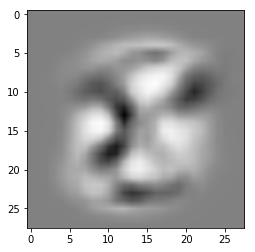

In [18]:
eightClass()

In [19]:
def eightClass():
    trainData = Data/255
    trainLabels = Labels
    weightVector = logisticRegression(trainData,trainLabels,20,0.08,0)
    accuracy = testing(trainData,trainLabels,weightVector)
    print(accuracy)
    drawWeight(weightVector)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


89.38000000000001


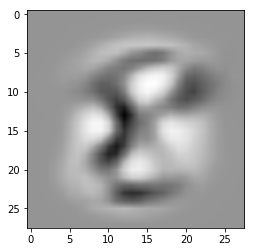

In [20]:
eightClass()

The training accuracy for 8 vs classification are done using two different testing data sets, in one testing set is same as the training data and in the other testing data it is divided into two parts by sklearn. The accuracy is around 90-92


# Insights from the image

From the image which is formed by the weight vector, we can see that there it is looking like a 8. This is due to the weight vector's pixels has more importance than other pixel's so the image looks like a 8. This is generated after processing all the numbers in the dataset. The image generated is a 8 which is formed from all the eights in the dataset!